In [1]:
import nltk

# Create a Text object
If you check out the nltk book, you will see they also have some corpora in the package itself. Here I'm showing how you could apply this to your own texts.

In [2]:
with open('pg84.txt', 'r', encoding = 'utf-8') as f:
    frankenstein_raw = f.read()
len(frankenstein_raw) # number of characters

438671

In [3]:
frankenstein_raw[:100]

'\ufeffThe Project Gutenberg eBook of Frankenstein, by Mary Wollstonecraft Shelley\n\nThis eBook is for the '

In [4]:
words = nltk.tokenize.word_tokenize(frankenstein_raw)
len(words)

88744

In [5]:
words[:30]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Frankenstein',
 ',',
 'by',
 'Mary',
 'Wollstonecraft',
 'Shelley',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United',
 'States',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the']

In [6]:
text = nltk.Text(words)
text

<Text: ﻿The Project Gutenberg eBook of Frankenstein , by...>

In [7]:
text.concordance('Frankenstein')

Displaying 25 of 29 matches:
﻿The Project Gutenberg eBook of Frankenstein , by Mary Wollstonecraft Shelley
efore using this eBook . Title : Frankenstein or , The Modern Prometheus Autho
T OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN * * * Frankenstein ; or , the Mo
TENBERG EBOOK FRANKENSTEIN * * * Frankenstein ; or , the Modern Prometheus by 
instantly sprung out . “ My dear Frankenstein , ” exclaimed he , “ how glad I 
r account myself . But , my dear Frankenstein , ” continued he , stopping shor
 expressive of suffering , “ M . Frankenstein is modest ; an excellent quality
nd afflicted father , “ Alphonse Frankenstein . “ Geneva , May 12th , 17—. ” C
y face with my hands . “ My dear Frankenstein , ” exclaimed Henry , when he pe
an creatures . She nursed Madame Frankenstein , my aunt , in her last illness 
shall again and again be heard ! Frankenstein , your son , your kinsman , your
, the which thou owest me . Oh , Frankenstein , be not equitable to every othe
ss and compassion ? Beli

In [8]:
text.similar('Frankenstein') # get words that are used in similar contexts

if before that i as but she of for and you where title which me do
beauty what these all


In [9]:
text.common_contexts(['Frankenstein', 'title']) # get contexts shared by two or more items

ebook_frankenstein


In [36]:
text.common_contexts(['Frankenstein', 'where'])

me_i


The results above indicate that you can find both _Frankenstein_ and _title_ with _ebook_ right before and _frankenstein_ right after; as well as both "me Frankenstein I" and "me where I".

In [10]:
text.similar('monster')

fiend murderer day scene sun man time path feelings work creature
friends door cottage will as desolation sea boat mind


In [11]:
text.common_contexts(['monster', 'murderer'])

the_that the_on the_whom the_of the_had


Plot a dispersion plot of several words (where they fall in in a text).

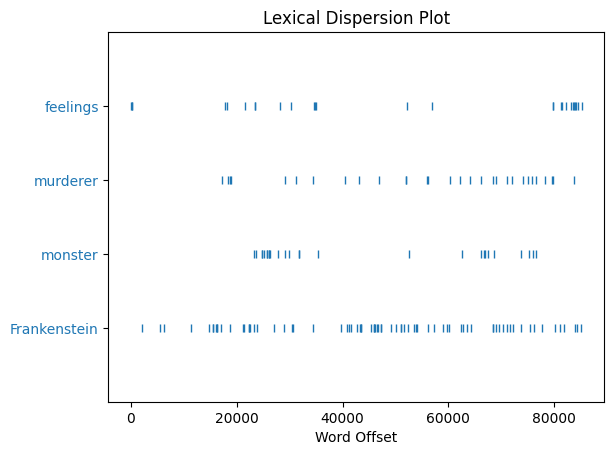

In [12]:
text.dispersion_plot(['Frankenstein', 'monster', 'murderer', 'feelings'])

Generate a text "in the style of" another text with `generate()`.

Count types, tokens and word frequencies

In [13]:
len(text)

88744

In [14]:
len(set(text))

8163

In [15]:
len(set(text))/len(text) # type-token ratio

0.09198368340394844

In [16]:
text.count('Frankenstein')

27

In [17]:
text.index('Frankenstein')

5

In [18]:
fdist = nltk.FreqDist(text)

In [19]:
type(fdist)

nltk.probability.FreqDist

In [20]:
?nltk.FreqDist

In [21]:
fdist.most_common(10)

[(',', 5104),
 ('the', 4073),
 ('and', 2997),
 ('I', 2839),
 ('.', 2808),
 ('of', 2747),
 ('to', 2154),
 ('my', 1632),
 ('a', 1395),
 ('in', 1135)]

In [22]:
fdist['Frankenstein']

27

In [23]:
fdist['monster']

30

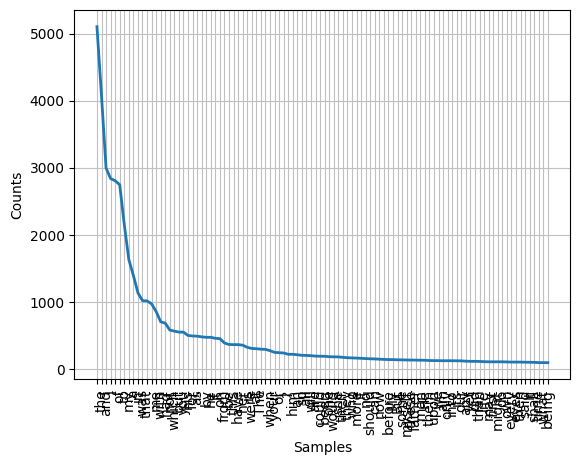

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
fdist.plot(100)

In [25]:
fdist.hapaxes()

['\ufeffThe',
 'Title',
 'Author',
 'Release',
 'Date',
 '31',
 '1993',
 '#',
 '84',
 'recently',
 'updated',
 '2022',
 'Language',
 'Produced',
 'Judith',
 'Boss',
 'Christy',
 'Phillips',
 'Lynn',
 'Hanninen',
 'David',
 'Meltzer',
 'HTML',
 'Al',
 'Haines',
 'Further',
 'corrections',
 'Menno',
 'Leeuw',
 'Godwin',
 'CONTENTS',
 'Dec.',
 'rejoice',
 'braces',
 'foretaste',
 'climes',
 'Inspirited',
 'skirting',
 'diffusing',
 'splendour',
 'There—for',
 'navigators—there',
 'sailing',
 'habitable',
 'undoubtedly',
 'solitudes',
 'attracts',
 'needle',
 'observations',
 'eccentricities',
 'consistent',
 'satiate',
 'conquer',
 'embarks',
 'holiday',
 'mates',
 'conjectures',
 'contest',
 'inestimable',
 'confer',
 'requisite',
 'ascertaining',
 'magnet',
 'effected',
 'dispelled',
 'glow',
 'contributes',
 'tranquillise',
 'purpose—a',
 'arriving',
 'Pacific',
 'passionately',
 'familiarity',
 'injunction',
 'embark',
 'seafaring',
 'faded',
 'perused',
 'effusions',
 'entranced',
 '

In [26]:
fdist.max()

','

In [27]:
fdist[',']

5104

In [28]:
fdist.freq(',') # relative frequency

0.05751374740827549

In [29]:
fdist[',']/len(text) # same as above

0.05751374740827549

Get collocations with the `.collocations()` method.

In [32]:
?nltk.Text.collocations

In [31]:
text.collocations()

Project Gutenberg-tm; Project Gutenberg; old man; United States;
Literary Archive; Mr. Kirwin; Gutenberg-tm electronic; Archive
Foundation; electronic works; Gutenberg Literary; natural philosophy;
native country; Mont Blanc; taken place; fellow creatures; electronic
work; Cornelius Agrippa; Gutenberg-tm License; set forth; dear Victor


In [33]:
nltk.pos_tag(text)

[('\ufeffThe', 'NN'),
 ('Project', 'NNP'),
 ('Gutenberg', 'NNP'),
 ('eBook', 'NN'),
 ('of', 'IN'),
 ('Frankenstein', 'NNP'),
 (',', ','),
 ('by', 'IN'),
 ('Mary', 'NNP'),
 ('Wollstonecraft', 'NNP'),
 ('Shelley', 'NNP'),
 ('This', 'DT'),
 ('eBook', 'NN'),
 ('is', 'VBZ'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('use', 'NN'),
 ('of', 'IN'),
 ('anyone', 'NN'),
 ('anywhere', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('and', 'CC'),
 ('most', 'JJS'),
 ('other', 'JJ'),
 ('parts', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('at', 'IN'),
 ('no', 'DT'),
 ('cost', 'NN'),
 ('and', 'CC'),
 ('with', 'IN'),
 ('almost', 'RB'),
 ('no', 'DT'),
 ('restrictions', 'NNS'),
 ('whatsoever', 'RB'),
 ('.', '.'),
 ('You', 'PRP'),
 ('may', 'MD'),
 ('copy', 'VB'),
 ('it', 'PRP'),
 (',', ','),
 ('give', 'VB'),
 ('it', 'PRP'),
 ('away', 'RB'),
 ('or', 'CC'),
 ('re-use', 'VB'),
 ('it', 'PRP'),
 ('under', 'IN'),
 ('the', 'DT'),
 ('terms', 'NNS'),
 ('of', 'IN'),
 ('the', 'D

# WordNet 

In [34]:
from nltk.corpus import wordnet as wn
cook_synsets = wn.synsets('cook')
cook_synsets

[Synset('cook.n.01'),
 Synset('cook.n.02'),
 Synset('cook.v.01'),
 Synset('cook.v.02'),
 Synset('cook.v.03'),
 Synset('fudge.v.01'),
 Synset('cook.v.05')]

In [35]:
# wn.synset('cook.n.01').lemma_names()
cook_synsets[0].lemma_names()

['cook']

In [36]:
cook_synsets[0].definition()

'someone who cooks food'

In [37]:
cook_synsets[0].examples()

[]

In [38]:
cook_synsets[0].name()

'cook.n.01'

In [39]:
for x in cook_synsets[0].hypernyms():
    print(x.name())
    print(x.lemma_names())

skilled_worker.n.01
['skilled_worker', 'trained_worker', 'skilled_workman']


In [40]:
for x in cook_synsets[0].hyponyms():
    print(x.name())
    print(x.lemma_names())

chef.n.01
['chef']
cookie.n.02
['cookie', 'cooky']
fry_cook.n.01
['fry_cook']
preserver.n.02
['preserver']
roaster.n.02
['roaster']
seasoner.n.01
['seasoner']


In [41]:
cook_synsets[0].pos()

'n'

In [42]:
pos_mappings = {'n' : 'noun', 'v' : 'verb', 'a' : 'adjective'}
for cook in cook_synsets:
    print(f'"{cook.name()}" - {pos_mappings[cook.pos()]}')
    example = '- ' + '; '.join(cook.examples()) if cook.examples() else ''
    print(cook.definition(), example)
    print(cook.lemma_names())
    print()

"cook.n.01" - noun
someone who cooks food 
['cook']

"cook.n.02" - noun
English navigator who claimed the east coast of Australia for Britain and discovered several Pacific islands (1728-1779) 
['Cook', 'James_Cook', 'Captain_Cook', 'Captain_James_Cook']

"cook.v.01" - verb
prepare a hot meal - My husband doesn't cook
['cook']

"cook.v.02" - verb
prepare for eating by applying heat - Cook me dinner, please; can you make me an omelette?; fix breakfast for the guests, please
['cook', 'fix', 'ready', 'make', 'prepare']

"cook.v.03" - verb
transform and make suitable for consumption by heating - These potatoes have to cook for 20 minutes
['cook']

"fudge.v.01" - verb
tamper, with the purpose of deception - Fudge the figures; cook the books; falsify the data
['fudge', 'manipulate', 'fake', 'falsify', 'cook', 'wangle', 'misrepresent']

"cook.v.05" - verb
transform by heating - The apothecary cooked the medicinal mixture in a big iron kettle
['cook']



# Texts from the web

Get the feed of a blog with `feedparser`

In [43]:
import feedparser

In [44]:
from bs4 import BeautifulSoup

In [45]:
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")

In [46]:
llog['feed']

{'language': 'en-US',
 'title': 'Language Log',
 'title_detail': {'type': 'text/plain',
  'language': 'en-US',
  'base': 'https://languagelog.ldc.upenn.edu/nll/?feed=atom',
  'value': 'Language Log'},
 'subtitle': '',
 'subtitle_detail': {'type': 'text/plain',
  'language': 'en-US',
  'base': 'https://languagelog.ldc.upenn.edu/nll/?feed=atom',
  'value': ''},
 'updated': '2023-05-16T00:34:56Z',
 'updated_parsed': time.struct_time(tm_year=2023, tm_mon=5, tm_mday=16, tm_hour=0, tm_min=34, tm_sec=56, tm_wday=1, tm_yday=136, tm_isdst=0),
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://languagelog.ldc.upenn.edu/nll'},
  {'rel': 'self',
   'type': 'application/atom+xml',
   'href': 'https://languagelog.ldc.upenn.edu/nll/?feed=atom'}],
 'link': 'https://languagelog.ldc.upenn.edu/nll',
 'id': 'https://languagelog.ldc.upenn.edu/nll/?feed=atom',
 'guidislink': False}

In [47]:
len(llog.entries)

13

In [48]:
llog.entries[2]

{'authors': [{'name': 'Mark Liberman', 'href': 'http://ling.upenn.edu/~myl'}],
 'author_detail': {'name': 'Mark Liberman',
  'href': 'http://ling.upenn.edu/~myl'},
 'href': 'http://ling.upenn.edu/~myl',
 'author': 'Mark Liberman',
 'title': '&quot;Mama ŠČ!&quot;',
 'title_detail': {'type': 'text/html',
  'language': 'en-US',
  'base': 'https://languagelog.ldc.upenn.edu/nll/?feed=atom',
  'value': '&quot;Mama ŠČ!&quot;'},
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://languagelog.ldc.upenn.edu/nll/?p=58691&utm_source=rss&utm_medium=rss&utm_campaign=mama-sc'},
  {'rel': 'replies',
   'type': 'text/html',
   'href': 'https://languagelog.ldc.upenn.edu/nll/?p=58691&utm_source=rss&utm_medium=rss&utm_campaign=mama-sc#comments',
   'count': '8',
   'thr:count': '8'},
  {'rel': 'replies',
   'type': 'application/atom+xml',
   'href': 'https://languagelog.ldc.upenn.edu/nll/?feed=atom&p=58691',
   'count': '8',
   'thr:count': '8'}],
 'link': 'https://languagelog.ldc.

In [50]:
nltk.word_tokenize(BeautifulSoup(llog.entries[2].content[0].value, 'html.parser').get_text())

['Among',
 'the',
 'entries',
 'in',
 'the',
 '2023',
 'Eurovision',
 'Song',
 'Contest',
 ',',
 'there',
 "'s",
 'one',
 'of',
 'particular',
 'linguistic',
 'and',
 'political',
 'interest',
 '—',
 'from',
 'Croatia',
 ',',
 'Let',
 '3',
 "'s",
 'Mama',
 'ŠČ',
 '!',
 ':',
 '[',
 'The',
 'video',
 'of',
 'the',
 'song',
 "'s",
 'final',
 'Eurovision',
 'performance',
 'is',
 'blocked',
 '(',
 'at',
 'least',
 'for',
 'now',
 ')',
 'in',
 'the',
 'U.S.',
 '…',
 'but',
 'there',
 'seems',
 'to',
 'be',
 'a',
 'version',
 'of',
 'it',
 'here…',
 ']',
 'The',
 'Croatian',
 'lyrics',
 'and',
 'an',
 'English',
 'translation',
 'are',
 'available',
 'on',
 'genius.com',
 ',',
 'and',
 'the',
 'annotation',
 'for',
 'the',
 'English',
 'translations',
 'explains',
 '(',
 'among',
 'other',
 'things',
 ')',
 'that',
 'Mama',
 'is',
 'a',
 'key',
 'word',
 'in',
 'the',
 'song',
 'as',
 'it',
 'references',
 'a',
 'national',
 'personification',
 'of',
 'Russia',
 'as',
 'a',
 'mother',
 '.',


Then the same procedures can be applied, converting that to a `Text`.